In [143]:
using CSV, DataFrames, Plots

In [155]:
input_file = "findings/shortresults.csv"
input_data = CSV.read(input_file, DataFrame)
@show sort!(input_data, :Hz)

input_data.fallingnanoseconds = input_data.fallingmicroseconds * 1000000


sort!(input_data, :Hz) = 7×3 DataFrame
 Row │ Hz     risingnanoseconds  fallingmicroseconds
     │ Int64  Int64              Float64
─────┼───────────────────────────────────────────────
   1 │  1562                620                 7.6
   2 │  3096                600                 8.04
   3 │  6250                566                 7.8
   4 │ 12500                544                 7.84
   5 │ 15625                510                 8.2
   6 │ 26000                521                 8.01
   7 │ 31250                470                 8.3


7-element Vector{Float64}:
 7.6e6
 8.039999999999999e6
 7.8e6
 7.84e6
 8.199999999999999e6
 8.01e6
 8.300000000000001e6

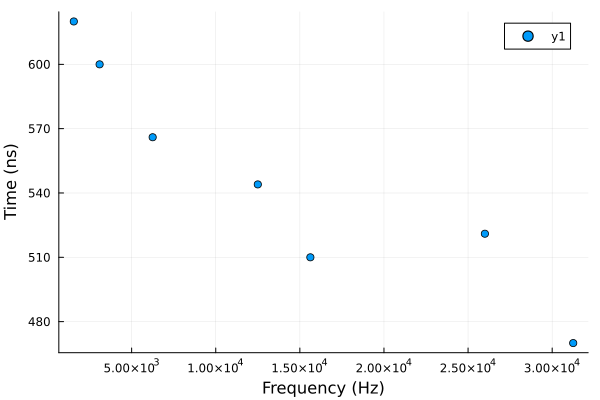

In [145]:
plot(input_data.Hz, input_data.risingnanoseconds, lt=:scatter, xlabel="Frequency (Hz)", ylabel="Time (ns)")

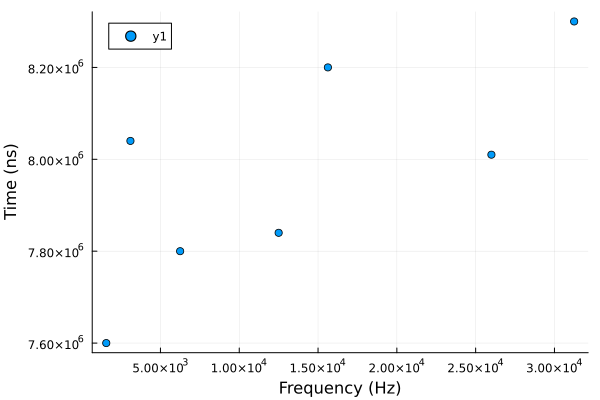

In [146]:
plot(input_data.Hz, input_data.fallingnanoseconds, lt=:scatter, xlabel="Frequency (Hz)", ylabel="Time (ns)")

In [147]:
using Polynomials
freq_fit_rising = fit(input_data.Hz, input_data.risingnanoseconds, 2)
freq_fit_falling = fit(input_data.Hz, input_data.fallingnanoseconds, 3)

Polynomial(7.632282764446949e6 + 66.32210257554975*x - 0.003992729274814355*x^2 + 8.088794085184676e-8*x^3)

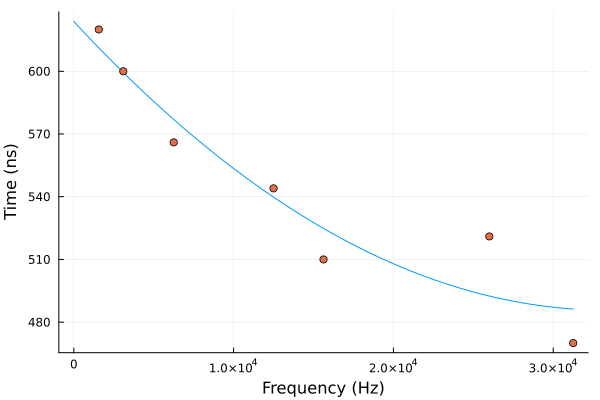

In [148]:
plot(freq_fit_rising, 0, 31250, label="Frequency Fit (Rising)")
plot!(input_data.Hz, input_data.risingnanoseconds, lt=:scatter, legend=false, xlabel="Frequency (Hz)", ylabel="Time (ns)")

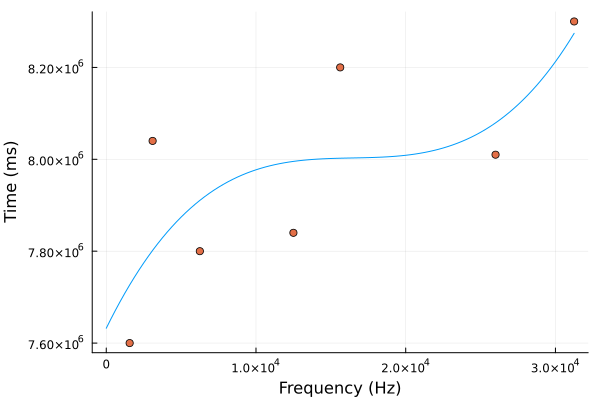

In [149]:
plot(freq_fit_falling, 0, 31250, label="Frequency Fit (Falling)")
plot!(input_data.Hz, input_data.fallingnanoseconds, lt=:scatter, legend=false, xlabel="Frequency (Hz)", ylabel="Time (ms)")

# Table generation
This lookup table is meant to be stored on a STM32F446RE. It has 512Kbytes of flash memory, so this code will occupy half of the available flash. Because 256Kbytes = 2.048e+6/32/3 = 21333.33, there will be 21333 values per 3 column. A lookup table is used instead of doing math on the microcontroller because floating-point math is extremely slow on embedded ARM microcontrollers despite a hardware FPU.

In [150]:
frequencies = range(0, stop=21333)

0:21333

In [151]:
delayrising = freq_fit_rising.(frequencies)
delayfalling = freq_fit_falling.(frequencies)
df = DataFrame(frequency=frequencies, delayrising=delayrising, delayfalling=delayfalling)
CSV.write("findings/delays.csv", df)

"findings/delays.csv"

In [154]:
# Sanity check: Number of rows * elements per row * bits per element / 8000 bits per byte
@show nrow(df)*3*32/8000

(nrow(df) * 3 * 32) / 8000 = 256.008


256.008